In [1]:
# Denetimsiz Öğrenme

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)

In [6]:
import matplotlib.pyplot as plt 

In [19]:
# X[:,0] # -> : Tüm satırları al -> [0] 0. sütunu al.

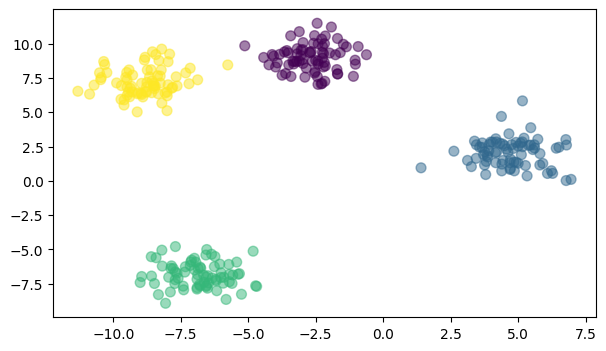

In [21]:
plt.figure(figsize=(7,4))
plt.scatter(X[:,0], X[:,1], c=y_true, s=50, alpha=0.5) 

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv("Mall_Customers.csv")
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
